# Air quality data

### Set-up Dependencies

In [165]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps

# Google developer API key
from config import gkey


# Configure gmaps
gmaps.configure(api_key=gkey)


### Set-up Multi-API Call
* This data set has 2 years available, so I will create two API calls and add all the date into a single datafram

In [166]:
# The data has 2 years
years = [2014, 2017]
# The endpoint will require I specify the year
url =  "https://usc.data.socrata.com/resource/bhyw-mxf5.json?$where=year="

### Save JSON data into Lists (pre-dataframe step)

In [167]:
# Initialize a list that will eventually be used for form the columns in dataframe.
count = []
dataset = []
date = []
geoid = []
location = []
lat = []
lng = []
neighborhood = []
policy_area = []
row_id = []
tract = []
tract_number = []
variable = []
year = []


for yr in years:
    query_url = f"{url}{yr}"
    response = requests.get(query_url)
    response_json = response.json()
    
    for key in range(len(response_json)):
        count.append(response_json[key]['count'])
        dataset.append(response_json[key]['dataset'])
        date.append(response_json[key]['date'])
        geoid.append(response_json[key]['geoid'])
        location.append(response_json[key]['location'])
        neighborhood.append(response_json[key]['neighborhood'])
        policy_area.append(response_json[key]['policy_area'])
        row_id.append(response_json[key]['row_id'])
        tract.append(response_json[key]['tract'])
        tract_number.append(response_json[key]['tract_number'])
        variable.append(response_json[key]['variable'])
        year.append(response_json[key]['year'])




### Split location column into lat and lng columns
* Having lat and logitudinal data will be useful for map visualization

In [168]:
# Split the location list into two lists, one for lat and one for long data
for i in range(len(location)):
    first = location[i].index(location[i][1])
    last = location[i].index(location[i][-1])
    unpacked = location[i][first:last]
    split_location = unpacked.split(",")
    lat.append(split_location[0])
    lng.append(split_location[1])


### Create Dataframe
* Create a dictionary that contains the list of data from the JSON data, and a label
* Pass the dict object into pd.DataFrame, and create a pandas object

In [169]:
dict = {"year" : year,
        "count" : count,
       "dataset" : dataset,
       "date" :  date,
       "geoid" : geoid,
       "location" : location,
        "lat" : lat,
        "lng" : lng,
        "neighborhood" : neighborhood,
        "policy area" : policy_area,
        "row id": row_id,
        "tract" : tract,
        "tract number" : tract_number,
        "variable" : variable,
       }

df = pd.DataFrame(data = dict)
df

,year,count,dataset,date,geoid,location,lat,lng,neighborhood,policy area,row id,tract,tract number,variable
0,2014,11.04010029,Air Quality,2014-01-01T00:00:00.000,1400000US06037101110,"(34.2595555, -118.293602)",34.2595555,-118.293602,Tujunga,Environment,PM2.5_Concentration_2014_1400000US06037101110,"Census Tract 1011.10, Los Angeles County, Cali...",101110,PM2.5 Concentration
1,2014,10.95372448,Air Quality,2014-01-01T00:00:00.000,1400000US06037101122,"(34.267357, -118.29024)",34.267357,-118.29024,Tujunga,Environment,PM2.5_Concentration_2014_1400000US06037101122,"Census Tract 1011.22, Los Angeles County, Cali...",101122,PM2.5 Concentration
2,2014,11.11423953,Air Quality,2014-01-01T00:00:00.000,1400000US06037101210,"(34.251998, -118.2926875)",34.251998,-118.2926875,Tujunga,Environment,PM2.5_Concentration_2014_1400000US06037101210,"Census Tract 1012.10, Los Angeles County, Cali...",101210,PM2.5 Concentration
3,2014,11.14308442,Air Quality,2014-01-01T00:00:00.000,1400000US06037101220,"(34.2511895, -118.281014)",34.2511895,-118.281014,Tujunga,Environment,PM2.5_Concentration_2014_1400000US06037101220,"Census Tract 1012.20, Los Angeles County, Cali...",101220,PM2.5 Concentration
4,2014,11.18952698,Air Quality,2014-01-01T00:00:00.000,1400000US06037101300,"(34.2455945, -118.271731)",34.2455945,-118.271731,Tujunga,Environment,PM2.5_Concentration_2014_1400000US06037101300,"Census Tract 1013, Los Angeles County, California",101300,PM2.5 Concentration
5,2014,11.21675181,Air Quality,2014-01-01T00:00:00.000,1400000US06037101400,"(34.244255, -118.296428)",34.244255,-118.296428,Tujunga,Environment,PM2.5_Concentration_2014_1400000US06037101400,"Census Tract 1014, Los Angeles County, California",101400,PM2.5 Concentration
6,2014,11.28482481,Air Quality,2014-01-01T00:00:00.000,1400000US06037102103,"(34.224155, -118.354339)",34.224155,-118.354339,Shadow Hills,Environment,PM2.5_Concentration_2014_1400000US06037102103,"Census Tract 1021.03, Los Angeles County, Cali...",102103,PM2.5 Concentration
7,2014,11.39135727,Air Quality,2014-01-01T00:00:00.000,1400000US06037102104,"(34.216189, -118.3456235)",34.216189,-118.3456235,Shadow Hills,Environment,PM2.5_Concentration_2014_1400000US06037102104,"Census Tract 1021.04, Los Angeles County, Cali...",102104,PM2.5 Concentration
8,2014,11.44396506,Air Quality,2014-01-01T00:00:00.000,1400000US06037102105,"(34.210852, -118.3480495)",34.210852,-118.3480495,Sun Valley,Environment,PM2.5_Concentration_2014_1400000US06037102105,"Census Tract 1021.05, Los Angeles County, Cali...",102105,PM2.5 Concentration
9,2014,11.16243397,Air Quality,2014-01-01T00:00:00.000,1400000US06037102107,"(34.2412955, -118.3292705)",34.2412955,-118.3292705,Shadow Hills,Environment,PM2.5_Concentration_2014_1400000US06037102107,"Census Tract 1021.07, Los Angeles County, Cali...",102107,PM2.5 Concentration


### Format and Clean Data for Further Analysis
* Convert columns to appropriate data types
* For data imported as strings, remove white space, and misc characters.


In [170]:
# Convert the following column from string to floats. 
# The count column contains pollution data.
# Location, lat and lng to be used for mapping and other analysis

df["count"] = pd.to_numeric(df["count"])
df["lat"] = pd.to_numeric(df["lat"])
df["lng"] = pd.to_numeric(df["lng"])

df.head()

,year,count,dataset,date,geoid,location,lat,lng,neighborhood,policy area,row id,tract,tract number,variable
0,2014,11.040100,Air Quality,2014-01-01T00:00:00.000,1400000US06037101110,"(34.2595555, -118.293602)",34.259555,-118.293602,Tujunga,Environment,PM2.5_Concentration_2014_1400000US06037101110,"Census Tract 1011.10, Los Angeles County, Cali...",101110,PM2.5 Concentration
1,2014,10.953724,Air Quality,2014-01-01T00:00:00.000,1400000US06037101122,"(34.267357, -118.29024)",34.267357,-118.290240,Tujunga,Environment,PM2.5_Concentration_2014_1400000US06037101122,"Census Tract 1011.22, Los Angeles County, Cali...",101122,PM2.5 Concentration
2,2014,11.114240,Air Quality,2014-01-01T00:00:00.000,1400000US06037101210,"(34.251998, -118.2926875)",34.251998,-118.292687,Tujunga,Environment,PM2.5_Concentration_2014_1400000US06037101210,"Census Tract 1012.10, Los Angeles County, Cali...",101210,PM2.5 Concentration
3,2014,11.143084,Air Quality,2014-01-01T00:00:00.000,1400000US06037101220,"(34.2511895, -118.281014)",34.251190,-118.281014,Tujunga,Environment,PM2.5_Concentration_2014_1400000US06037101220,"Census Tract 1012.20, Los Angeles County, Cali...",101220,PM2.5 Concentration
4,2014,11.189527,Air Quality,2014-01-01T00:00:00.000,1400000US06037101300,"(34.2455945, -118.271731)",34.245595,-118.271731,Tujunga,Environment,PM2.5_Concentration_2014_1400000US06037101300,"Census Tract 1013, Los Angeles County, California",101300,PM2.5 Concentration


###  Aggregate Data by Year

In [211]:
# Aggregate by neighborhood and generate columns for lat, long, and pollution counts.
aggregated_data = df.groupby("neighborhood")["count"].agg(["min", "max", "mean"])

# Create an array for the mean pollution per city
pollution_mean = np.array(aggregated_data["count"]["mean"])

# Create an array for the lat and log for each neighborhood
neighborhood_lat = np.array(aggregated_data["lat"]["min"])
neighborhood_lng = np.array(aggregated_data["lng"]["min"])


,min,max,mean
neighborhood,,,
Adams-Normandie,12.610655,12.890000,12.756371
Arleta,10.755628,11.210000,11.061893
Arlington Heights,12.550961,12.890000,12.727205
Atwater Village,12.202552,12.470000,12.380503
Baldwin Hills/Crenshaw,12.050000,12.592871,12.370973
Bel-Air,11.630000,11.930089,11.780045
Beverly Crest,11.630000,12.030324,11.814591
Beverly Grove,12.050000,12.408499,12.202593
Beverly Hills,12.050000,12.086217,12.068108


### Visualize Data using Gmaps

In [208]:
# Store latitude and longitude in locations
locations = df[["lat", "lng"]]

# Plot Heatmap
fig = gmaps.figure()

symbol_layer = gmaps.symbol_layer(locations, fill_color='red', stroke_color='black', scale=2)

# Add layer
fig.add_layer(symbol_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

### Determine the relationship between latitude and pollution counts

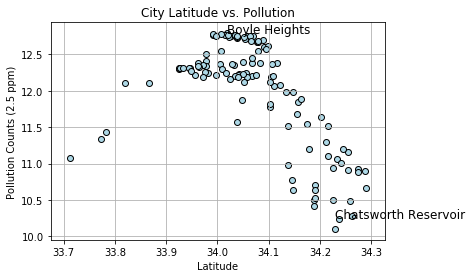

In [173]:
# Plot the pollution counts by neighborhood (via their lat) and visualize in gmaps
x = neighborhood_lat
y = pollution_mean
plt.scatter(x, y, c = 'lightblue', edgecolors = "black")
plt.xlabel("Latitude")
plt.ylabel("Pollution Counts (2.5 ppm)")
plt.title(f"City Latitude vs. Pollution")
plt.grid(True)

# Label the neighborhood with the heighest and lowest counts
# X,Y Coordinates for BH and Chatsworth reservoice
boyle_heights_lat = 34.018117
boyle_heights_cnt = 12.791653
chatsworth_res_lat = 34.228206
chatsworth_res_cnt = 10.245630
plt.text(x = boyle_heights_lat, y = boyle_heights_cnt, s = "Boyle Heights", fontsize = 12)
plt.text(chatsworth_res_lat, chatsworth_res_cnt, s = "Chatsworth Reservoir", fontsize = 12)
plt.savefig('lat_vs_pollution.png')


### Determine the Covariance
* Use numpy np.cov() to evaluate
* a) how the temperature and latitude vary together
* b) determine the directionality of any association
* Statistical Principal:
* The covariance is used to determine the direction of a linear relationship between two variables as follows:
* If both variables tend to increase or decrease together, the coefficient is positive.
* If one variable tends to increase as the other decreases, the coefficient is negative.

In [174]:
x = neighborhood_lat
y = pollution_mean

np.cov(x,y)

# Compute the covariance matrix: covariance_matrix
covariance_matrix = np.cov(x, y)
covariance_matrix

# Extract covariance of latitude and Max Temperature
pol_lav_covariance = covariance_matrix[0,1]
pol_lav_covariance

if (pol_lav_covariance < 0):
    print(f"The covariance for latitude and temperature is {round(pol_lav_covariance,4)}, and is negative. \nThis states that as one variable increases, the other decreases.")
else:
    print(f"The covariance for latitude and temperature is {round(pol_lav_covariance,4)}, is positive. \nThis states that these variable tend to either increase or decrease together.")

The covariance for latitude and temperature is -0.0482, and is negative. 
This states that as one variable increases, the other decreases.


### Determine the Pearson Coefficient
* Use numpy np.corrcoef() to evaluate 
* a) how the temperature and latitude vary together
* b) Examine the linear relationship between these two variables 

* Statistical Principal: 
* Pearson correlation coefficient, also called the Pearson r, is often easier to interpret than the covariance.
* The strenght of the association depends on how close the value approaches -1 or 1.
* The directionality of the association depends on whether it is positive or negative.

In [175]:
# Function that Computes the Pearson correlation coefficient between two arrays.
def pearson_r(x, y):

    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor: r
r = pearson_r(x, y)

# Print the result
print(r)

if (r < 0):
    print(f"Since r = {round(r,4)}, is negative; as one variable increases, the other decreases.")
    if(r <= -0.75):
        print(f"Since r = {round(r,4)} is close to -1; There is a strong inverse relationship between these two variables.")
if (r > 0):
    print(f"Since r = {round(r,4)}, is positive; both variables increase together, or decrease together.")
    if (r >= 0.75):
        print(f"Since r = {round(r,4)} is close to 1; There is a strong positive relationship between these two variables.")
    else:
        print("There is a weak or no association between both variables.")

-0.5914960694899909
Since r = -0.5915, is negative; as one variable increases, the other decreases.


### Visualize 5 neighborhoods with the higest and lowest pollution and plot in gmap

In [176]:
# Sort the data by ascending and descending values in the count column and subset into min and max
max_sorted_df = aggregated_data.sort_values(by = ("count", "mean"), ascending = False)
min_sorted_df = aggregated_data.sort_values(by = ("count", "mean"), ascending = True)

# Get the neighborhoods with the highest and lowest pollution counts
neigh_top_counts = max_sorted_df.iloc[0:5]
neigh_low_counts = min_sorted_df.iloc[0:5]

# Further subset the lat and lng for each of these cities and save into a new df
neigh_top_loc = neigh_top_counts[[("lat", "min"), ("lng", "min")]]
neigh_low_loc = neigh_low_counts[[("lat", "min"), ("lng", "min")]]

In [209]:
# Store latitude and longitude in locations
top_locations = neigh_top_loc[["lat", "lng"]]
low_locations = neigh_low_loc[["lat", "lng"]]

# Plot Heatmap
fig = gmaps.figure()

# Create heat layer
top_layer = gmaps.heatmap_layer(top_locations)
top_marker_layer = gmaps.marker_layer(top_locations, label='high')

low_layer = gmaps.heatmap_layer(low_locations)
low_marker_layer = gmaps.marker_layer(low_locations, label='low')

# Add layer
fig.add_layer(top_layer)
fig.add_layer(top_marker_layer)
fig.add_layer(low_layer)
fig.add_layer(low_marker_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

### Visualize the counts in gmaps to highlight distribution of pollution

In [190]:
# location dataframe
aggregated_loc_data = df.groupby("neighborhood")["lat", "lng"].agg(["min"])


# Create an array for the mean pollution per city
aggregated_pol_data = df.groupby("neighborhood")["count"].agg(["mean"])
aggregated_pol_float = aggregated_pol_data.astype(dtype = "float")
aggregated_pol_series = aggregated_pol_float["mean"]



In [197]:
# Plot Heatmap
locations = aggregated_loc_data
weights = aggregated_pol_series

fig = gmaps.figure(map_type="SATELLITE")

# # Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights = weights)

# # Add layer
fig.add_layer(heat_layer)

# # Display figure
fig

Figure(layout=FigureLayout(height='420px'))

### Park Data

In [216]:
park_url =  "https://usc.data.socrata.com/resource/kp5h-fmqh.json?dataset=Parks Access"

query_url_park = f"{park_url}"
response = requests.get(query_url_park)
park_response_json = response.json()
park_response_json

[{'count': '0.2307633501355139',
  'dataset': 'Parks Access',
  'date': '2015-01-01T00:00:00.000',
  'geoid': '1400000US06037217002',
  'location': {'type': 'Point', 'coordinates': [-118.381096, 34.049649]},
  'neighborhood': 'Pico-Robertson',
  'policy_area': 'Social Connectedness',
  'row_id': 'Acres_of_Parks_Per_1,000_People_2015_1400000US06037217002',
  'tract': 'Census Tract 2170.02, Los Angeles County, California',
  'tract_number': '217002',
  'variable': 'Acres of Parks Per 1,000 People',
  'year': '2015'},
 {'count': '4.212398007039556',
  'dataset': 'Parks Access',
  'date': '2015-01-01T00:00:00.000',
  'geoid': '1400000US06037271600',
  'location': {'type': 'Point', 'coordinates': [-118.4310805, 34.0213795]},
  'neighborhood': 'Mar Vista',
  'policy_area': 'Social Connectedness',
  'row_id': 'Acres_of_Parks_Per_1,000_People_2015_1400000US06037271600',
  'tract': 'Census Tract 2716, Los Angeles County, California',
  'tract_number': '271600',
  'variable': 'Acres of Parks Per

In [ ]:
count = []
dataset = []
date = []
geoid = []
location = []
lat = []
lng = []
neighborhood = []
policy_area = []
row_id = []
tract = []
tract_number = []
variable = []
year = []


for yr in years:
    query_url = f"{url}{yr}"
    response = requests.get(query_url)
    response_json = response.json()
    
    for key in range(len(response_json)):
        count.append(response_json[key]['count'])
        dataset.append(response_json[key]['dataset'])
        date.append(response_json[key]['date'])
        geoid.append(response_json[key]['geoid'])
        location.append(response_json[key]['location'])
        neighborhood.append(response_json[key]['neighborhood'])
        policy_area.append(response_json[key]['policy_area'])
        row_id.append(response_json[key]['row_id'])
        tract.append(response_json[key]['tract'])
        tract_number.append(response_json[key]['tract_number'])
        variable.append(response_json[key]['variable'])
        year.append(response_json[key]['year'])